# adaboost实践作业

## 1.对adaboost分类及回归的代码，逐行添加注释。

In [1]:
import numpy as np   
import math           #导入数值运算库
#训练样本数据
x=[1.5,2.2,3.1,4.6,6.8,6.5,7.9,8.7,9.8,10.2] # 特征
y=[1,1,-1,-1,1,-1,1,1,-1,-1]                # 类别，分别用-1和1表示
x=np.array(x)    # 构建数组
y=np.array(y) 
n=len(y)         # 定义类别y的长度

In [2]:
x1=np.zeros(len(x))             # 构建同x维度一致的用0填充的数组
x2=np.zeros(len(x))
for i in range(len(x)):
    x1[i]=math.modf(x[i])[1]       # 整数部分
    x2[i]=math.modf(x[i])[0]*10    # 小数部分

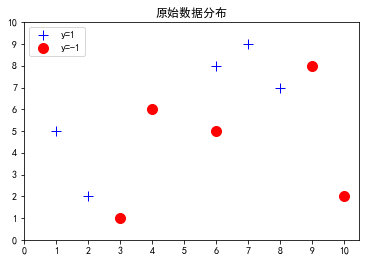

In [4]:
# 绘制样本分布图
import matplotlib.pyplot as plt    # 导入绘图库
plt.rcParams['font.sans-serif']=['SimHei']
#plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']    # 防止中文乱码

plt.plot(x1[y==1],x2[y==1],'b+',MarkerSize=10);   # 设置蓝色+的数据图标
plt.plot(x1[y==-1],x2[y==-1],'ro',MarkerSize=10);   # 设置红色圆圈的数据图标
plt.xticks(np.arange(0, 11, 1))    # 设置x坐标轴
plt.yticks(np.arange(0, 11, 1))    # 设置y坐标轴
plt.legend(("y=1","y=-1"),loc="upper left")      # 给图像加图例
plt.title('原始数据分布')     #设置标题
plt.show()

In [5]:
#定义弱分类器
def h12(x,th):
    pre_y=np.zeros(len(x))    # 构建x长度一样的以0填充的预测集数组
    for i in range(len(x)):   # for循环
        if x[i]<th:          # if语句判断并分类
            pre_y[i]=1          
        else:
            pre_y[i]=-1
    return pre_y       # 返回预测值

In [6]:
#定义弱分类器
def h3(x,th):
    pre_y=np.zeros(len(x))       # 构建x长度一样的以0填充的预测集数组
    for i in range(len(x)):     # for循环
        if x[i]>th:             # if语句判断分类
            pre_y[i]=1
        else:
            pre_y[i]=-1
    return pre_y            # 返回预测值

In [7]:
from math import log    # 导入数学运算库

D1=np.ones(len(x))/len(x)   # 构建分类数组
D2=np.ones(len(x))/len(x)

pre_y1=h12(x1,2.5)          # 划分预测集
pre_y2=h12(x1,8.5)
pre_y3=h3(x2,6.5)

es1=np.zeros(3)         # 创建一维数组
es1[0]=np.sum(D1[y!=pre_y1])   # 求和分类
es1[1]=np.sum(D1[y!=pre_y2])
es1[2]=np.sum(D1[y!=pre_y3])

a1=0.5*log((1-min(es1))/min(es1)) # 模型权重

In [8]:
es1   #取第一个分类器

array([0.3, 0.3, 0.3])

In [9]:
a1   # 模型权重

0.4236489301936017

In [10]:
for i in range(len(x)):  # 更新权重
    pre_y=h12(x1,2.5)    # 索引
    D2[y==pre_y]=D1[y==pre_y]/(2*(1-min(es1)))  # 分类
    D2[y!=pre_y]=D1[y!=pre_y]/(2*min(es1))

In [11]:
D2    # 分类结果

array([0.07142857, 0.07142857, 0.07142857, 0.07142857, 0.16666667,
       0.07142857, 0.16666667, 0.16666667, 0.07142857, 0.07142857])

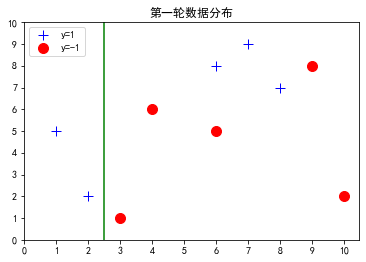

In [12]:
plt.plot(x1[y==1],x2[y==1],'b+',LineWidth=4,MarkerSize=10)   # 设置蓝色+的数据图标
plt.plot(x1[y==-1],x2[y==-1],'ro',LineWidth=4,MarkerSize=10)  # 设置红色圆圈的数据图标
plt.axvline(x=2.5,ls="-",c="green")                      #   添加垂直直线
plt.xticks(np.arange(0, 11, 1))                          # 设置x轴坐标
plt.yticks(np.arange(0, 11, 1))                          # 设置y轴坐标
plt.legend(("y=1","y=-1"),loc="upper left")             # 给图像加图例
plt.title('第一轮数据分布')                           # 设置图像标题
plt.show()

In [13]:
import pandas as pd           # 导入库
# 利用字典
dict1={'x':x,'y':y,'D1':D1,'D2':D2,'预测1':h12(x1,2.5)}    # 定义字典
table1=pd.DataFrame(dict1)    # 转化为数据框
table1

,x,y,D1,D2,预测1
0,1.5,1,0.1,0.071429,1.0
1,2.2,1,0.1,0.071429,1.0
2,3.1,-1,0.1,0.071429,-1.0
3,4.6,-1,0.1,0.071429,-1.0
4,6.8,1,0.1,0.166667,-1.0
5,6.5,-1,0.1,0.071429,-1.0
6,7.9,1,0.1,0.166667,-1.0
7,8.7,1,0.1,0.166667,-1.0
8,9.8,-1,0.1,0.071429,-1.0
9,10.2,-1,0.1,0.071429,-1.0


In [14]:
result1=np.sign(a1*h12(x1,2.5))  #第一次迭代后模型结果
result1

array([ 1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [15]:
from sklearn.metrics import accuracy_score    # 导入sklearn库的准确率计算函数
accuracy_score(y,result1)          # 计算预测准确率

0.7

第二轮迭代

In [16]:
#最优分类器
es2=np.zeros(3)       # 创建一维数组
es2[0]=np.sum(D2[y!=pre_y1])    # 求和分类
es2[1]=np.sum(D2[y!=pre_y2])
es2[2]=np.sum(D2[y!=pre_y3])

a2=0.5*log((1-min(es2))/min(es2)) #模型权重

In [17]:
es2 #取第二个分类器

array([0.5       , 0.21428571, 0.21428571])

In [18]:
a2   # 模型权重

0.6496414920651304

In [19]:
D3=np.ones(len(x))/len(x)    # 创建一维权重数据
for i in range(len(x)):  # 更新权重
    pre_y=h12(x1,8.5)
    D3[y==pre_y]=D2[y==pre_y]/(2*(1-min(es2))) # 分类
    D3[y!=pre_y]=D2[y!=pre_y]/(2*min(es2))

In [20]:
D3   # 分类结果

array([0.04545455, 0.04545455, 0.16666667, 0.16666667, 0.10606061,
       0.16666667, 0.10606061, 0.10606061, 0.04545455, 0.04545455])

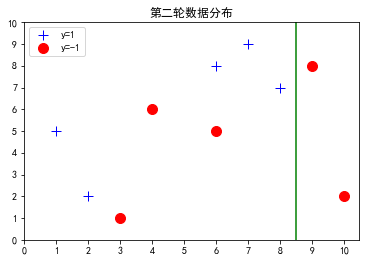

In [21]:
plt.plot(x1[y==1],x2[y==1],'b+',LineWidth=4,MarkerSize=10)   # 设置蓝色+的数据图标
plt.plot(x1[y==-1],x2[y==-1],'ro',LineWidth=4,MarkerSize=10)    # 设置红色圆圈的数据图标
plt.axvline(x=8.5,ls="-",c="green")               # 添加垂直直线
plt.xticks(np.arange(0, 11, 1))                 # 设置x轴坐标
plt.yticks(np.arange(0, 11, 1))                 # 设置y轴坐标
plt.legend(("y=1","y=-1"),loc="upper left")    # 给图像加图例
plt.title('第二轮数据分布')                    # 设置图像标题
plt.show()

In [22]:
# 利用字典
dict2={'x':x,'y':y,'D1':D1,'D2':D2,'预测1':h12(x1,2.5),'D3':D3,'预测2':h12(x1,8.5)}   # 定义字典
table2=pd.DataFrame(dict2)    # 转化为数据框
table2

,x,y,D1,D2,预测1,D3,预测2
0,1.5,1,0.1,0.071429,1.0,0.045455,1.0
1,2.2,1,0.1,0.071429,1.0,0.045455,1.0
2,3.1,-1,0.1,0.071429,-1.0,0.166667,1.0
3,4.6,-1,0.1,0.071429,-1.0,0.166667,1.0
4,6.8,1,0.1,0.166667,-1.0,0.106061,1.0
5,6.5,-1,0.1,0.071429,-1.0,0.166667,1.0
6,7.9,1,0.1,0.166667,-1.0,0.106061,1.0
7,8.7,1,0.1,0.166667,-1.0,0.106061,1.0
8,9.8,-1,0.1,0.071429,-1.0,0.045455,-1.0
9,10.2,-1,0.1,0.071429,-1.0,0.045455,-1.0


In [23]:
result2=np.sign(a1*h12(x1,2.5)+a2*h12(x1,8.5))  #第二次迭代后模型结果
result2

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.])

In [24]:
from sklearn.metrics import accuracy_score  # 导入sklearn库的准确率计算函数
accuracy_score(y,result2)   # 计算预测准确率

0.7

In [25]:
#最优分类器
es3=np.zeros(3)    # 创建一维数组
es3[0]=np.sum(D3[y!=pre_y1])   # 求和分类
es3[1]=np.sum(D3[y!=pre_y2])
es3[2]=np.sum(D3[y!=pre_y3])

a3=0.5*log((1-min(es3))/min(es3)) #模型权重

In [26]:
es3    # 取第三个分类器

array([0.31818182, 0.5       , 0.13636364])

In [27]:
a3     # 模型权重

0.9229133452491652

In [28]:
D4=np.ones(len(x))/len(x)    # 创建一维权重数据
for i in range(len(x)):  #更新权重
    pre_y=h3(x2,6.5)
    D4[y==pre_y]=D3[y==pre_y]/(2*(1-min(es3)))    # 分类
    D4[y!=pre_y]=D3[y!=pre_y]/(2*min(es3))

In [29]:
D4   # 分类结果

array([0.16666667, 0.16666667, 0.09649123, 0.09649123, 0.06140351,
       0.09649123, 0.06140351, 0.06140351, 0.16666667, 0.02631579])

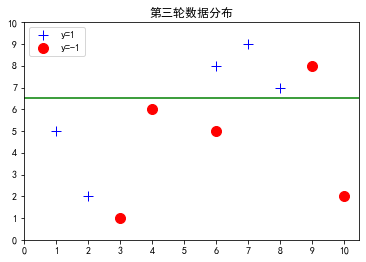

In [30]:
plt.plot(x1[y==1],x2[y==1],'b+',LineWidth=4,MarkerSize=10)   # 设置蓝色+的数据图标 
plt.plot(x1[y==-1],x2[y==-1],'ro',LineWidth=4,MarkerSize=10)    # 设置红色圆圈的数据图标
plt.axhline(y=6.5,ls="-",c="green")    # 添加水平直线
plt.xticks(np.arange(0, 11, 1))       # 设置x轴坐标
plt.yticks(np.arange(0, 11, 1))      # 设置y轴坐标
plt.legend(("y=1","y=-1"),loc="upper left")    # 给图像加图例
plt.title('第三轮数据分布')                # 设置图像标题
plt.show()

In [31]:
dict3={'x':x,'y':y,'D1':D1,'D2':D2,'预测1':h12(x1,2.5),'D3':D3,'预测2':h12(x1,8.5),'D4':D4,'预测3':h3(x2,6.5)}  #定义字典
table3=pd.DataFrame(dict3)    # 转化成数据框
table3

,x,y,D1,D2,预测1,D3,预测2,D4,预测3
0,1.5,1,0.1,0.071429,1.0,0.045455,1.0,0.166667,-1.0
1,2.2,1,0.1,0.071429,1.0,0.045455,1.0,0.166667,-1.0
2,3.1,-1,0.1,0.071429,-1.0,0.166667,1.0,0.096491,-1.0
3,4.6,-1,0.1,0.071429,-1.0,0.166667,1.0,0.096491,-1.0
4,6.8,1,0.1,0.166667,-1.0,0.106061,1.0,0.061404,1.0
5,6.5,-1,0.1,0.071429,-1.0,0.166667,1.0,0.096491,-1.0
6,7.9,1,0.1,0.166667,-1.0,0.106061,1.0,0.061404,1.0
7,8.7,1,0.1,0.166667,-1.0,0.106061,1.0,0.061404,1.0
8,9.8,-1,0.1,0.071429,-1.0,0.045455,-1.0,0.166667,1.0
9,10.2,-1,0.1,0.071429,-1.0,0.045455,-1.0,0.026316,-1.0


In [32]:
result3=np.sign(a1*h12(x1,2.5)+a2*h12(x1,8.5)+a3*h3(x2,6.5))  #第三次迭代后模型结果
result3

array([ 1.,  1., -1., -1.,  1., -1.,  1.,  1., -1., -1.])

In [33]:
from sklearn.metrics import accuracy_score     
accuracy_score(y,result3)     # 计算预测准确度

1.0

In [34]:
x  # 打印数组

array([ 1.5,  2.2,  3.1,  4.6,  6.8,  6.5,  7.9,  8.7,  9.8, 10.2])

In [35]:
x_sort=sorted(x)  # 排序

In [36]:
x_split=np.zeros(len(x)-1)    #构建0数组

In [37]:
for i in range(len(x)-1):
    x_sort=sorted(x)     # 排序
    x_split[i]=(x_sort[i]+x_sort[i+1])*0.5     

In [38]:
x_split    # 返回新数组

array([ 1.85,  2.65,  3.85,  5.55,  6.65,  7.35,  8.3 ,  9.25, 10.  ])

In [39]:
D1=np.ones(len(x))/len(x)      # 创建一维权重数据
es1=np.zeros(len(x_split))     # 创建一维数组
es2=np.zeros(len(x_split))
for i in range(len(x_split)):
    pre_y1=h12(x,x_split[i])   #第一种函数
    es1[i]=np.sum(D1[y!=pre_y1])  
    
    pre_y2=h3(x,x_split[i])   #第二种函数
    es2[i]=np.sum(D1[y!=pre_y2]) 
    
if min(es1)<=min(es2):      # 判断语句
    print("选择第一种函数")
    split=x_split[np.argmin(es1)]     # 默认将列表展平，显示最小值的下标
    print("最佳分割点为"+str(split))
    es_min=min(es1)
    print("最小误差率"+str(es_min))
    for i in range(len(x)):  #更新权重
        pre_y=h12(x,split)
        D2[y==pre_y]=D1[y==pre_y]/(2*(1-es_min))    # 分类
        D2[y!=pre_y]=D1[y!=pre_y]/(2*es_min)
    print("权重更新为:")
    print(D2)
else:
    print("选择第二种函数")
    split=x_split[np.argmin(es2)]   # 默认将列表展平，显示最小值的下标
    print("最佳分割点为"+str(split))
    es_min=min(es2)
    print("最小误差率"+str(es_min))
    for i in range(len(x)):  #更新权重
        pre_y=h3(x,split)
        D2[y==pre_y]=D1[y==pre_y]/(2*(1-es_min))    # 分类
        D2[y!=pre_y]=D1[y!=pre_y]/(2*es_min)
    print("权重更新为:")
    print(D2)

a1=0.5*log((1-es_min)/es_min)    #模型权重
print("模型权重为"+str(a1))

选择第一种函数
最佳分割点为2.6500000000000004
最小误差率0.30000000000000004
权重更新为:
[0.07142857 0.07142857 0.07142857 0.07142857 0.16666667 0.07142857
 0.16666667 0.16666667 0.07142857 0.07142857]
模型权重为0.4236489301936017


In [40]:
#多次更新
pre_ys=dict()    # 创建字典
D=dict()       
es_mins=dict()
a=dict()
splits=dict()
D1=np.ones(len(x))/len(x)    # 创建一维权重数据
D[1]=D1
es1=np.zeros(len(x_split))   # 构建以0填充的数组
es2=np.zeros(len(x_split))
for k in range(2,5):
    print("第"+str(k-1)+"次迭代")
    
    for i in range(len(x_split)):
        pre_y1=h12(x,x_split[i])   #第一种函数
        es1[i]=np.sum(D[k-1][y!=pre_y1])     # 求和分类
    
        pre_y2=h3(x,x_split[i])   #第二种函数
        es2[i]=np.sum(D[k-1][y!=pre_y2])    # 求和分类
    
    D[k]=np.ones(len(x))   # 创建一维权重数据
    
    if min(es1)<=min(es2):  
        print("选择第一种函数")
        splits[k-1]=x_split[np.argmin(es1)]  # 默认将列表展平，显示最小值的下标
        print("最佳分割点为"+str(splits[k-1]))
        es_mins[k-1]=min(es1)
        print("最小误差率"+str(es_mins[k-1]))
        for i in range(len(x)):  #更新权重
            pre_y=h12(x,splits[k-1])
            D[k][y==pre_y]=D[k-1][y==pre_y]/(2*(1-es_mins[k-1]))  # 分类
            D[k][y!=pre_y]=D[k-1][y!=pre_y]/(2*es_mins[k-1])
        print("权重更新为:")
        print(D[k])
        pre_ys[k-1]=h12(x,splits[k-1])
        print("预测值为:")
        print(pre_ys[k-1])
    else:
        print("选择第二种函数")
        splits[k-1]=x_split[np.argmin(es2)]  # 默认将列表展平，显示最小值的下标
        print("最佳分割点为"+str(splits[k-1]))
        es_mins[k-1]=min(es2)
        print("最小误差率"+str(es_mins[k-1]))
        for i in range(len(x)):  #更新权重
            pre_y=h3(x,splits[k-1])
            D[k][y==pre_y]=D[k][y==pre_y]/(2*(1-es_mins[k-1]))    # 分类
            D[k][y!=pre_y]=D[k][y!=pre_y]/(2*es_mins[k-1])
        print("权重更新为:")
        print(D[k])
        pre_ys[k-1]=h3(x,splits[k-1])
        
    a[k-1]=0.5*log((1-es_mins[k-1])/es_mins[k-1])  #模型权重
    print("模型权重为"+str(a[k-1]))
    print("")
    
    if es_mins[k-1]<0.0001:  #模型终止条件
        break

第1次迭代
选择第一种函数
最佳分割点为2.6500000000000004
最小误差率0.30000000000000004
权重更新为:
[0.07142857 0.07142857 0.07142857 0.07142857 0.16666667 0.07142857
 0.16666667 0.16666667 0.07142857 0.07142857]
预测值为:
[ 1.  1. -1. -1. -1. -1. -1. -1. -1. -1.]
模型权重为0.4236489301936017

第2次迭代
选择第一种函数
最佳分割点为9.25
最小误差率0.2142857142857143
权重更新为:
[0.04545455 0.04545455 0.16666667 0.16666667 0.10606061 0.16666667
 0.10606061 0.10606061 0.04545455 0.04545455]
预测值为:
[ 1.  1.  1.  1.  1.  1.  1.  1. -1. -1.]
模型权重为0.6496414920651304

第3次迭代
选择第二种函数
最佳分割点为6.65
最小误差率0.18181818181818185
权重更新为:
[2.47358557e+04 2.47358557e+04 7.26443430e-03 7.26443430e-03
 7.26443430e-03 7.26443430e-03 7.26443430e-03 7.26443430e-03
 2.47358557e+04 2.47358557e+04]
模型权重为0.752038698388137



In [41]:
D   # 创建的数组

{1: array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]),
 2: array([0.07142857, 0.07142857, 0.07142857, 0.07142857, 0.16666667,
        0.07142857, 0.16666667, 0.16666667, 0.07142857, 0.07142857]),
 3: array([0.04545455, 0.04545455, 0.16666667, 0.16666667, 0.10606061,
        0.16666667, 0.10606061, 0.10606061, 0.04545455, 0.04545455]),
 4: array([2.47358557e+04, 2.47358557e+04, 7.26443430e-03, 7.26443430e-03,
        7.26443430e-03, 7.26443430e-03, 7.26443430e-03, 7.26443430e-03,
        2.47358557e+04, 2.47358557e+04])}

In [42]:
splits   # 最佳切分点

{1: 2.6500000000000004, 2: 9.25, 3: 6.65}

In [43]:
a    # 模型权重

{1: 0.4236489301936017, 2: 0.6496414920651304, 3: 0.752038698388137}

In [44]:
pre_ys  # 模型预测值

{1: array([ 1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.]),
 2: array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.]),
 3: array([-1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.])}

In [45]:
result=0
for i in range(1,4):  #构造最终的模型
    result=result+a[i]*pre_ys[i] 
result=np.sign(result)      # 生成数字符号（数字前的正负号）的型数据
print(result)

[ 1.  1. -1. -1.  1. -1.  1.  1. -1. -1.]


In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y,result)    # 计算预测准确率

1.0

In [47]:
from sklearn.tree import DecisionTreeClassifier    # 导入决策树
from sklearn.ensemble import AdaBoostClassifier    # 导入adaboost 
#一层
adaboost=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                            n_estimators=1,
                            random_state=0)   # 建立一层adaboost模型

In [48]:
adaboost.fit(x.reshape(-1,1), y)   # 算法在训练数据集上的拟合

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [49]:
adaboost.predict(x.reshape(-1,1))   # 模型预测

array([ 1,  1, -1, -1, -1, -1, -1, -1, -1, -1])

In [50]:
adaboost.score(x.reshape(-1,1),y)   # 模型的准确率

0.7

In [51]:
adaboost.estimator_errors_     # 模型的错误率

array([0.3])

In [52]:
#两层
adaboost=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                            n_estimators=2,
                            random_state=0)
adaboost.fit(x.reshape(-1,1), y)    # 建立2层adaboost模型

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [53]:
adaboost.score(x.reshape(-1,1),y)   # 模型的准确率

0.8

In [54]:
adaboost.estimator_errors_     # 模型的错误率

array([0.3, 0.2])

In [55]:
#三层
adaboost=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                            n_estimators=3,
                            random_state=0)
adaboost.fit(x.reshape(-1,1), y)   # 建立三层adaboost模型

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [56]:
adaboost.score(x.reshape(-1,1),y)   # 模型的准确率

1.0

In [57]:
adaboost.estimator_errors_    # 模型的误差

array([3.00000000e-01, 2.00000003e-01, 5.37119868e-05])

In [58]:
import numpy as np
import math
#训练样本数据
x=[1,2,3,4,5,6,7,8,9,10]
y=[1.5,5.2,3.1,6.6,6.8,6.5,7.9,8.7,9.8,8.2] #特征
x=np.array(x)    # 构建数组
y=np.array(y) 
n=len(y)  

In [59]:
x_sort=sorted(x)    # 排序
x_split=np.zeros(len(x)-1)   # 生成用0填充的数组
for i in range(len(x)-1):
    x_sort=sorted(x)        # 排序
    x_split[i]=(x_sort[i]+x_sort[i+1])*0.5

In [60]:
x_split  

array([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5])

In [61]:
#定义弱分类器
def h1(x,th):    
    list1=[]
    list2=[]
    pre_y=np.zeros(len(x))  # 生成用0填充的数组
    for i in range(len(x)):
        if x[i]<th:
            list1.append(i)   # 分类添加
        else:
            list2.append(i)
    
    pre_y[list1]=sum(y[list1])/len(list1)  #分类
    pre_y[list2]=sum(y[list2])/len(list2)
    
    return pre_y

In [63]:
h1(x,1.5)  # 在1.5处分类结果

array([1.5       , 6.97777778, 6.97777778, 6.97777778, 6.97777778,
       6.97777778, 6.97777778, 6.97777778, 6.97777778, 6.97777778])

In [64]:
h1(x,2.5)  # 在2.5处分类结果

array([3.35, 3.35, 7.2 , 7.2 , 7.2 , 7.2 , 7.2 , 7.2 , 7.2 , 7.2 ])

In [65]:
h1(x,3.5)  # 在3.5处分类结果

array([3.26666667, 3.26666667, 3.26666667, 7.78571429, 7.78571429,
       7.78571429, 7.78571429, 7.78571429, 7.78571429, 7.78571429])

In [67]:
D1=np.ones(len(x))/len(x)    # 创建一维权重数据
es=np.zeros(len(x_split))    # 创建以0填充的数组
for i in range(len(x_split)):
    pre_y=h1(x,x_split[i])   
    e=abs(y-pre_y)/max(abs(y-pre_y))  # 以绝对值分类
    es[i]=np.sum(D1*e)    # 求和
        
split=x_split[np.argmin(es)]   # 将列表展平，显示最小值的下标
pre_y_best=h1(x,split)
e_best=abs(y-pre_y_best)/max(abs(y-pre_y_best))   # 以绝对值分类
a1=min(es)/(1-min(es)) 
Z1=np.sum(a1**(1-e_best)*D1)   #求和
D2=D1*(1-e_best)/Z1

In [68]:
es    # 构建的数组

array([0.34498567, 0.37317073, 0.53522459, 0.48846154, 0.42929936,
       0.37681159, 0.37269373, 0.39008746, 0.37605634])

In [69]:
split   # 最佳切分点

1.5

In [70]:
D2   #预测结果

array([0.14915439, 0.08077415, 0.        , 0.13462359, 0.14231637,
       0.1307772 , 0.11368214, 0.08291104, 0.04060076, 0.10214298])

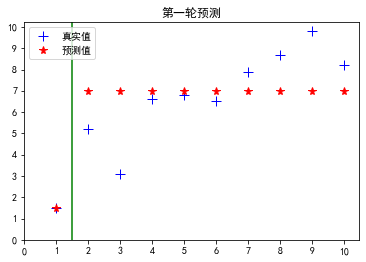

In [72]:
plt.plot(x,y,'b+',LineWidth=4,MarkerSize=10)    # 设置蓝色+的数据图标
plt.plot(x,h1(x,1.5),'r*',LineWidth=4,MarkerSize=8)    # 设置红色圆圈的数据图标
plt.axvline(x=1.5,ls="-",c="green")      # 添加水平直线
plt.xticks(np.arange(0, 11, 1))    # 设置x轴坐标
plt.yticks(np.arange(0, 11, 1))     # 设置y轴坐标
plt.legend(("真实值","预测值"),loc="upper left")   # 给图像加图例
plt.title('第一轮预测')       # 设置图像标题
plt.show()

E:\Anaconda3\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


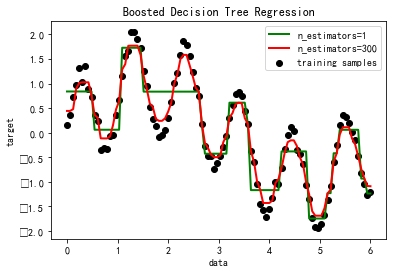

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor     # 导入库

# 创建数据集
rng = np.random.RandomState(1)        # 一个伪随机数生成器
X = np.linspace(0, 6, 100)[:, np.newaxis]    # 在指定的间隔内返回均匀间隔的数字
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

# 训练模型
regr_1 = DecisionTreeRegressor(max_depth=4)   # 决策树

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)  # adaboost

regr_1.fit(X, y)  # 建立1层模型
regr_2.fit(X, y)  # 建立2层模型

# 预测
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# 画图
plt.figure()   # 设置画布
plt.scatter(X, y, c="k", label="training samples")   # 设置训练数据
plt.plot(X, y_1, c="g", label="n_estimators=1", linewidth=2)   # 设置模型1预测数据
plt.plot(X, y_2, c="r", label="n_estimators=300", linewidth=2)  # 设置模型2测数据
plt.xlabel("data")   # X轴标签
plt.ylabel("target")  # y轴标签
plt.title("Boosted Decision Tree Regression")  # 设置图像标题
plt.legend()   # 显示图例
plt.show()

## 2.利用breast_cancer数据集构建adaboost分类模型，预测是否得癌症，并与其他分类模型做比较，说明其预测的效果

### adaboost模型 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
breast_cancer= load_breast_cancer()

In [3]:
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)

In [4]:
encoder = LabelEncoder()
binary_encoded_y = pd.Series(encoder.fit_transform(y))

In [5]:
train_X, test_X, train_y, test_y = train_test_split(X, binary_encoded_y, random_state=1)

In [59]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
classifier.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [63]:
predictions = classifier.predict(test_X)

In [64]:
confusion_matrix(test_y, predictions)

array([[ 0, 88],
       [55,  0]], dtype=int64)

In [67]:
from sklearn import metrics

In [68]:
# 深度=1的CART树做为adaboost的基分类器
base_estimator = DecisionTreeClassifier(max_depth=1)
n_estimators = np.arange(1,101,10)
accs_train = []
accs_test = []

for n_estimator in n_estimators:
    adaB = AdaBoostClassifier(base_estimator= base_estimator,n_estimators=n_estimator, learning_rate= 0.5, random_state=0)
    adaB.fit(X_train, y_train)

    y_train_pred = adaB.predict(X_train)
    acc_train = metrics.accuracy_score(y_train, y_train_pred)
    accs_train.append(acc_train)
    
    y_test_pred = adaB.predict(X_test)
    acc_test = metrics.accuracy_score(y_test, y_test_pred)
    accs_test.append(acc_test)

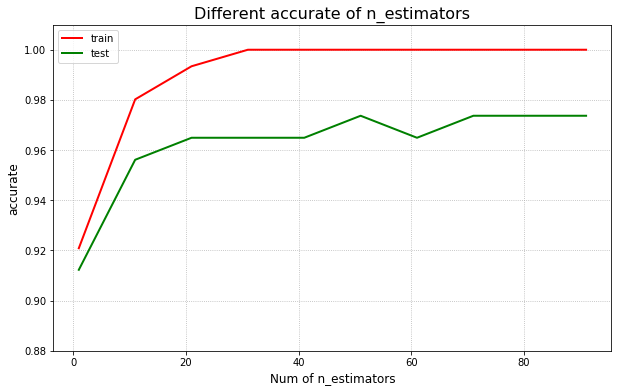

In [69]:
#画图
plt.figure(figsize=(10,6))
plt.plot(n_estimators, accs_train, 'r-',lw=2, label='train')
plt.plot(n_estimators, accs_test, 'g-',lw=2, label='test')
plt.ylim(0.88,1.01)
plt.xlabel('Num of n_estimators',fontsize = 12)
plt.ylabel('accurate',fontsize =12)
plt.grid(b = True,ls= ':')
plt.title('Different accurate of n_estimators',fontsize = 16)
plt.legend(loc = 'best')
plt.show()

In [72]:
# learning_rate对模型效果的影响
base_estimator = DecisionTreeClassifier(max_depth=1)
learning_rates = [0.05, 0.1, 0.5, 0.9]
n_estimators = np.arange(1,41,1)

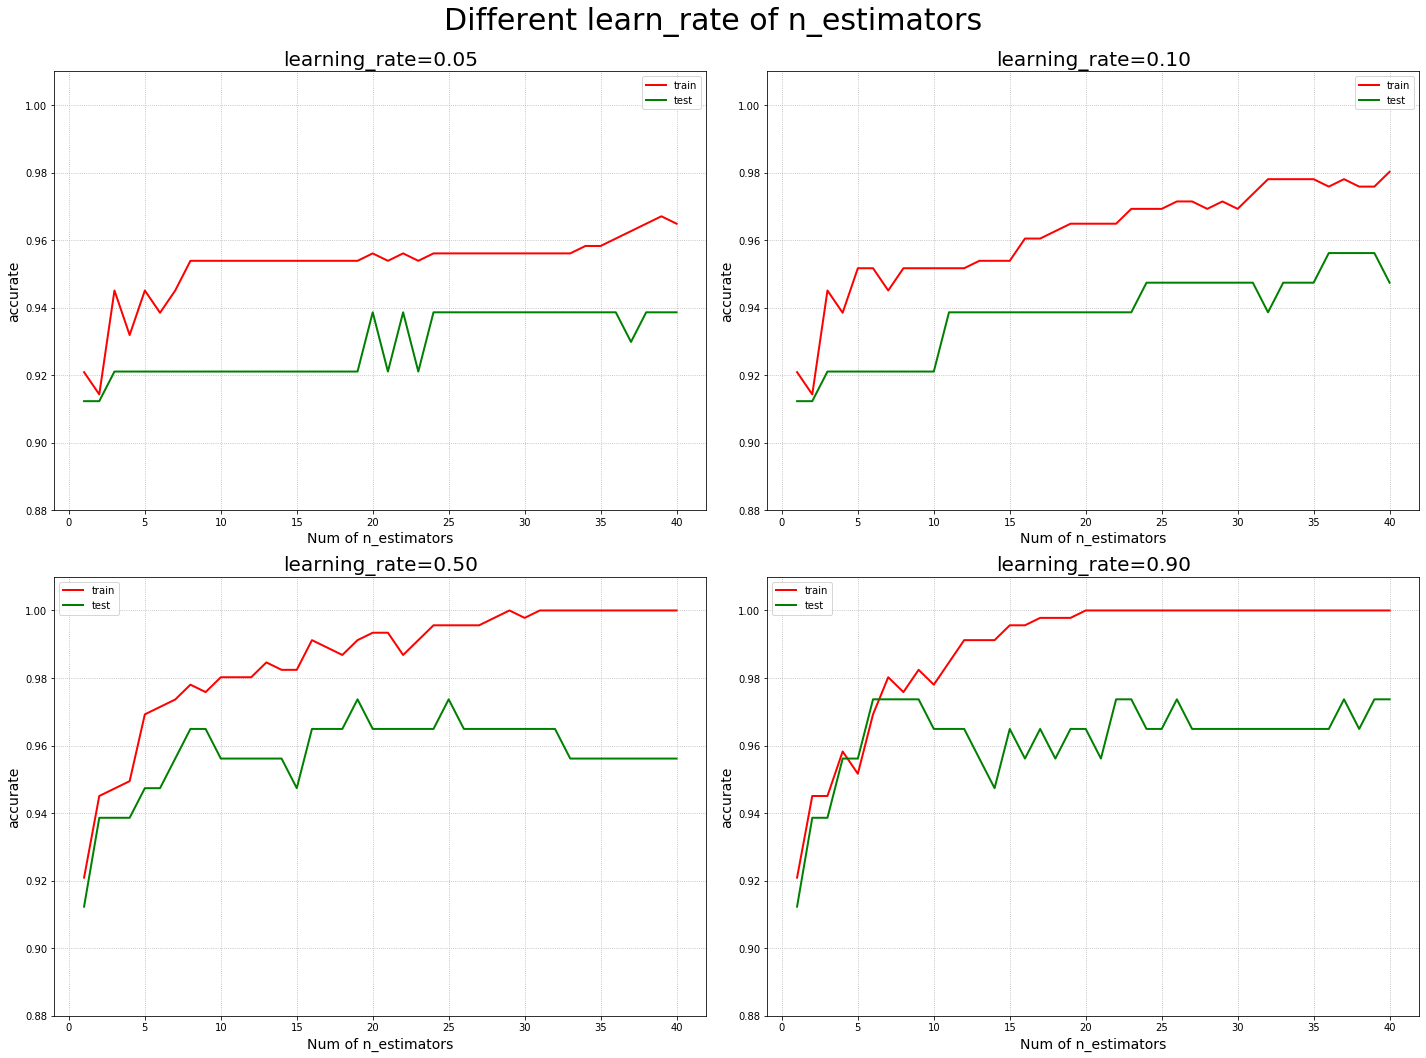

In [76]:
plt.figure(figsize=(20,15), facecolor='w')
for i, learning_rate in enumerate(learning_rates):
    accs_train = []
    accs_test = []
    for n_estimator in n_estimators:
        adaB = AdaBoostClassifier(base_estimator= base_estimator,n_estimators=n_estimator, learning_rate= learning_rate, random_state=0)
        adaB.fit(X_train, y_train)

        y_train_pred = adaB.predict(X_train)
        acc_train = metrics.accuracy_score(y_train, y_train_pred)
        accs_train.append(acc_train)

        y_test_pred = adaB.predict(X_test)
        acc_test = metrics.accuracy_score(y_test, y_test_pred)
        accs_test.append(acc_test)
    
    plt.subplot(2, 2, i+1)
    plt.plot(n_estimators, accs_train, 'r-',lw=2, label='train')
    plt.plot(n_estimators, accs_test, 'g-',lw=2, label='test')
    plt.ylim(0.88,1.01)
    plt.xlabel('Num of n_estimators',fontsize = 14)
    plt.ylabel('accurate',fontsize =14)
    plt.grid(b = True,ls= ':')
    plt.title('learning_rate=%.2f'%learning_rate, fontsize = 20)
    plt.legend(loc = 'best')
    
plt.suptitle('Different learn_rate of n_estimators', fontsize=30)
plt.tight_layout(1.4)
plt.subplots_adjust(top=0.92)
plt.show()

### 决策树

In [77]:
max_depths = [1, 5]
n_estimators = np.arange(1,41,1)

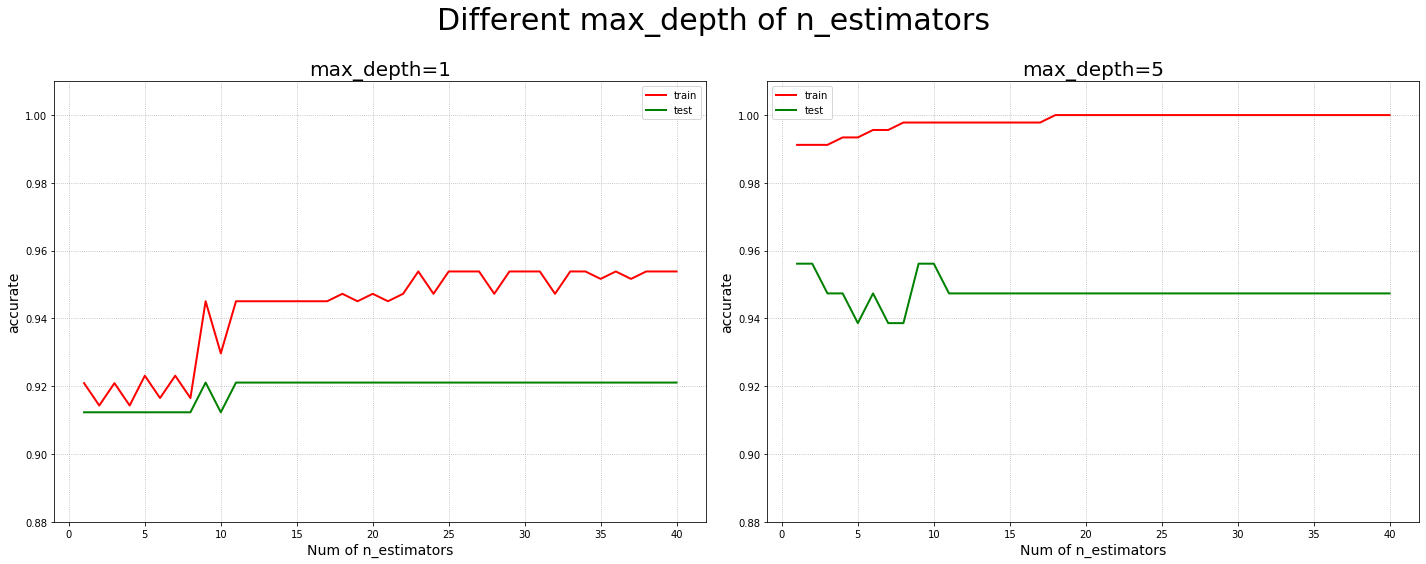

In [79]:
plt.figure(figsize=(20,8), facecolor='w')
for i, max_depth in enumerate(max_depths):
    accs_train = []
    accs_test = []
    for n_estimator in n_estimators:
        adaB = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=max_depth) ,
                                  n_estimators=n_estimator, learning_rate= 0.01, random_state=0)
        adaB.fit(X_train, y_train)

        y_train_pred = adaB.predict(X_train)
        acc_train = metrics.accuracy_score(y_train, y_train_pred)
        accs_train.append(acc_train)

        y_test_pred = adaB.predict(X_test)
        acc_test = metrics.accuracy_score(y_test, y_test_pred)
        accs_test.append(acc_test)
    
    plt.subplot(1, 2, i+1)
    plt.plot(n_estimators, accs_train, 'r-',lw=2, label='train')
    plt.plot(n_estimators, accs_test, 'g-',lw=2, label='test')
    plt.ylim(0.88,1.01)
    plt.xlabel('Num of n_estimators',fontsize = 14)
    plt.ylabel('accurate',fontsize =14)
    plt.grid(b = True,ls= ':')
    plt.title('max_depth=%s'%max_depth, fontsize = 20)
    plt.legend(loc = 'best')

plt.suptitle('Different max_depth of n_estimators', fontsize=30)
plt.tight_layout(1.4)
plt.subplots_adjust(top=0.85)
plt.show()

### 逻辑回归 

In [8]:
from sklearn.metrics import mean_squared_error,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [101]:
#进行标准化
std = StandardScaler()
x_train1 = std.fit_transform(X_train)
x_test1 = std.transform(X_test)

In [104]:
#逻辑回归预测
lg = LogisticRegression(penalty='l2',C=1.0)
lg.fit(x_train1,y_train)
y_predict = lg.predict(x_test1)
print("计算的回归系数为：",lg.coef_)

E:\Anaconda3\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


计算的回归系数为： [[-0.27606602 -0.30310086 -0.29072665 -0.3524495  -0.08887332  0.69489667
  -0.83159164 -0.90390551  0.04029888  0.36520447 -1.19757111  0.35202956
  -0.74109251 -0.97521346 -0.27495612  0.6191506   0.25707841 -0.35592781
   0.17637931  0.52153286 -0.87737574 -1.40343681 -0.76559961 -0.90697874
  -0.79031648 -0.01037606 -0.93300924 -0.95154361 -0.90587541 -0.17442082]]


In [106]:
print("准确率为：",lg.score(x_test1,y_test))

准确率为： 0.9824561403508771


### 线性回归

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False).fit(X_train,y_train)
print('系数矩阵是：\n',reg.coef_)
print('截距项是：\n',reg.intercept_)
print('R方为：\n',reg.score(X_train,y_train))

系数矩阵是：
 [ 4.03052088e-01 -1.95411025e-03 -5.46890242e-02 -1.74456941e-04
 -1.64790404e-01  5.58729352e+00 -1.42117750e+00 -1.57745575e+00
  3.09322243e-01 -2.48669376e+00 -6.03910538e-01  7.60116657e-03
  3.44796092e-02  1.33637827e-03 -1.59927521e+01 -7.18768872e-03
  3.41911951e+00 -9.60682870e+00 -2.42015105e+00  6.00056649e+00
 -1.92876362e-01 -9.65550662e-03  3.74537831e-03  9.48167254e-04
 -6.46772306e-01 -1.46606436e-01 -2.85769813e-01 -1.23273938e+00
 -6.30072040e-01 -3.51767910e+00]
截距项是：
 3.0493685838193794
R方为：
 0.7765232434185574


In [32]:
predicted=reg.predict(X_test)
print(predicted)
print(y_test)
print('测试数据R方为：\n',reg.score(X_test,y_test))

[ 0.83751508  0.49803997 -0.29650738  0.70651109  0.11386447 -0.16836144
 -0.04479423  0.7141426   0.9103937   0.36779715 -0.02191585  1.06716106
  0.86223298  1.10150954  0.99539173  1.07353743  0.89513906  0.85477172
 -0.15204306  0.74188142  0.91561454  0.76774398  0.15426617  0.9346942
  0.57925368  0.66908409  1.00490402  0.93063933  0.78360115  0.61721161
  0.76609545  0.28755539 -0.11556097  0.96820627  0.84842856  0.89514185
  1.12244305  0.96055202  0.67322023  1.29616451  0.86630851  1.29128005
  1.34419318  0.5154523   0.57506935  0.90555871  1.02107956  1.12742378
  0.86676325  0.8458652   0.46448125  0.98040675 -0.07037318  1.13385667
  0.00221105 -0.0768032   0.92824523 -0.02378631  0.81310025  1.25055109
  1.25182696  0.23226962  0.29819676  1.04521416  0.68492182  0.76613135
  0.92564258  1.01671824  0.86809916  0.05084389  0.62246874 -0.18065812
  0.61943987  1.03811258  0.92708939  1.16375808  0.2651374   0.98633698
  1.09164333  1.25341768  0.94777615  0.01223398  0.

### SVM 

In [33]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)
svm_y = lsvc.predict(X_test)

E:\Anaconda3\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [35]:
from sklearn.metrics import classification_report
# print 'Accuracy on the predict result (should be 1.0): ', lr.score(X_test, lr_y)
print ('Accuracy of the SVM: ' , lsvc.score(X_test, y_test))

Accuracy of the SVM:  0.9473684210526315


In [36]:
print (classification_report(y_test, svm_y, target_names = ['Benign', 'Malignant'])) 

              precision    recall  f1-score   support

      Benign       1.00      0.85      0.92        39
   Malignant       0.93      1.00      0.96        75

    accuracy                           0.95       114
   macro avg       0.96      0.92      0.94       114
weighted avg       0.95      0.95      0.95       114



### XGBoost

In [1]:
import xgboost
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier 
from sklearn.metrics import accuracy_score

In [6]:
model = XGBClassifier(learning_rate=0.01)
model.fit(train_X, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [7]:
y_pred = model.predict(test_X)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0])

In [8]:
from sklearn import metrics
# ROC曲线下与坐标轴围成的面积
print ('AUC: %.4f' % metrics.roc_auc_score(test_y ,y_pred))
# 准确率
print ('Accuracy: %.4f' % metrics.accuracy_score(test_y ,y_pred))
print ('Recall: %.4f' % metrics.recall_score(test_y ,y_pred))
# 精确率和召回率的调和平均数
print ('F1-score: %.4f' %metrics.f1_score(test_y ,y_pred))
print ('Precesion: %.4f' %metrics.precision_score(test_y ,y_pred))

AUC: 0.9341
Accuracy: 0.9441
Recall: 0.8909
F1-score: 0.9245
Precesion: 0.9608


### 模型对比 

通过对breast_cancer数据集分别构建adaboost模型，决策树，逻辑回归，线性回归和SVM模型，我们发现逻辑回归模型的预测准确率最高，为0.98，故用于后续模型预测。

## 3.加载diabetes数据集，构建一年以后病情进展指标y回归模型，并与其他回归模型做比较，说明其预测效果。

In [9]:
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()

In [10]:
X=diabetes.data
y=diabetes.target

In [11]:
from sklearn.model_selection import train_test_split
train_x3, test_x3, train_y3, test_y3 = train_test_split(X,y, test_size=0.3, random_state=14)
print(len(train_x3))

309


### 线性回归 

In [4]:
from sklearn import linear_model
linreg=linear_model.LinearRegression()   #创建线性回归

In [5]:
linreg.fit(train_x3, train_y3)
linreg.coef_

array([  32.03000032, -228.38626681,  492.80665731,  313.61844116,
       -991.31389923,  551.99413533,  190.16297006,  278.51146815,
        781.03825662,   72.08348977])

In [6]:
# 计算预测结果
pred_y3 = linreg.predict(test_x3)
pred_y3 

array([144.86833799, 223.84045276, 119.89182449, 152.07411301,
        78.91890036, 197.63901681, 124.51759392, 231.33694622,
        70.80216694, 165.68879413, 212.78257136,  83.59771503,
       130.16066038, 104.25053292, 124.39067081, 117.53072173,
       242.19219413, 149.70042865, 243.87095199, 160.28103277,
       101.00337348, 123.49436335, 257.11627405, 199.36449506,
       158.64093582, 102.53749701,  66.81982445, 230.84684891,
       211.40406579,  82.22386332, 201.58566356, 116.56322835,
       163.81802834,  65.78521092, 125.62835289, 108.94986755,
       105.28738034, 195.33121721, 183.68157973, 139.13487277,
        69.27753438, 237.27495979, 217.37365466, 113.91033001,
       175.70085313, 166.43785742, 190.30791487, 111.03069064,
       193.58519942, 205.38440565,  63.83469836,  78.11109234,
       138.85237914, 154.90555064, 105.28738167,  60.47393199,
       142.04737855,  97.34320111,  54.63028391, 118.60492531,
       116.79929739, 159.77956943, 132.07282232, 163.17

In [9]:
# 计算均方误差(损失值)
print(mean_squared_error(test_y3, pred_y3))

3180.3670319563716


In [10]:
linreg.score(train_x3, train_y3)  

0.5194074106259234

Coefficients: 
 [941.43097333]
Mean squared error: 3035.06
Variance score: 0.41


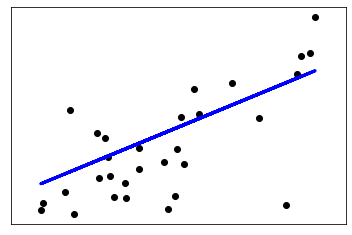

In [83]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-30]
diabetes_X_test = diabetes_X[-30:]
# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-30]
diabetes_y_test = diabetes.target[-30:]
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" 
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color = 'black')
plt.plot(diabetes_X_test, diabetes_y_pred, color = 'blue', linewidth = 3)
plt.xticks(())
plt.yticks(())
plt.show()

### adaboost回归 

In [14]:
#获取一个特征
diabetes_x_temp = diabetes.data[:, np.newaxis, 2] 

diabetes_x_train = diabetes_x_temp[:-20]   #训练样本
diabetes_x_test = diabetes_x_temp[-20:]    #测试样本 后20行
diabetes_y_train = diabetes.target[:-20]   #训练标记
diabetes_y_test = diabetes.target[-20:]    #预测对比标记

In [104]:
# 训练模型
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300)

regr_1.fit(diabetes_x_train, diabetes_y_train)
regr_2.fit(diabetes_x_train, diabetes_y_train)

# 预测
y_1 = regr_1.predict(diabetes_x_test)
y_2 = regr_2.predict(diabetes_x_test)

In [105]:
regr_1.score(diabetes_x_test, diabetes_y_test)

0.45560494111815064

In [103]:
regr_2.score(diabetes_x_test, diabetes_y_test)

0.39218571127596713

### 模型对比

通过对糖尿病的数据集建立线性回归模型和adaboost模型，我们发现线性回归的预准确率最高。